In [1]:
# read tiny shakespeare

with open('tinyshakespeare.txt', 'r') as f:
    text = f.read()

print(f'length of text {len(text)}')
print(text[:1000])

length of text 1115393
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not i

In [2]:
# Here are all the unique characters in the text
chars = sorted(list(set(text)))
print(''.join(chars))

vocab_size = len(chars)
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [3]:
# create mapping from characters to integers
string_to_index = {ch:i for i, ch in enumerate(chars)}
index_to_string = {i: ch for i, ch in enumerate(chars)}

# encoder: convert string to list of int
encode = lambda s : [string_to_index[c] for c in s] 

# decoder: 
decode = lambda l : ''.join([index_to_string[i] for i in l])

print(encode('hello, bitch'))
print(decode(encode('hello, bitch')))

[46, 43, 50, 50, 53, 6, 1, 40, 47, 58, 41, 46]
hello, bitch


In [4]:
import torch 
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype)
print(data[:1000])

c:\Users\EddyM\miniconda3\envs\ai-env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1115393]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [5]:
# train - validation split
n = int(0.9 * len(data))
train_data = data[:n]
val_data = data[n:]

In [6]:
block_size = 8
train_data[:block_size + 1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [7]:
x = train_data[ : block_size]
y = train_data[1 : block_size + 1]
for t in range(block_size):
    context = x[: t + 1]
    target = y[t]
    print(f'when input is {context} the target is {target}')

when input is tensor([18]) the target is 47
when input is tensor([18, 47]) the target is 56
when input is tensor([18, 47, 56]) the target is 57
when input is tensor([18, 47, 56, 57]) the target is 58
when input is tensor([18, 47, 56, 57, 58]) the target is 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target is 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target is 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target is 58


In [8]:
torch.manual_seed(1337)
batch_size = 4  # how many independant sequences will we process in parallel
block_size = 8  # what is the maximum context length for prefiction

def get_batch(split):
    # generate a small batch of data of inputs x & targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size, ))
    x = torch.stack([data[i: i + block_size] for i in ix])
    y = torch.stack([data[i + 1: i + block_size + 1] for i in ix])
    return x, y


xb, yb = get_batch('train')
print('inputs:')
print(xb.shape)
print(xb)
print('targets:')
print(yb.shape)
print(yb)

print('-----')

for b in range(batch_size):
    for t in range(block_size):
        context = xb[b, :t + 1]
        target = yb[b, t]
        print(f'When input is {context.tolist()} the target: {target}')

inputs:
torch.Size([4, 8])
tensor([[53, 59,  6,  1, 58, 56, 47, 40],
        [49, 43, 43, 54,  1, 47, 58,  1],
        [13, 52, 45, 43, 50, 53,  8,  0],
        [ 1, 39,  1, 46, 53, 59, 57, 43]])
targets:
torch.Size([4, 8])
tensor([[59,  6,  1, 58, 56, 47, 40, 59],
        [43, 43, 54,  1, 47, 58,  1, 58],
        [52, 45, 43, 50, 53,  8,  0, 26],
        [39,  1, 46, 53, 59, 57, 43,  0]])
-----
When input is [53] the target: 59
When input is [53, 59] the target: 6
When input is [53, 59, 6] the target: 1
When input is [53, 59, 6, 1] the target: 58
When input is [53, 59, 6, 1, 58] the target: 56
When input is [53, 59, 6, 1, 58, 56] the target: 47
When input is [53, 59, 6, 1, 58, 56, 47] the target: 40
When input is [53, 59, 6, 1, 58, 56, 47, 40] the target: 59
When input is [49] the target: 43
When input is [49, 43] the target: 43
When input is [49, 43, 43] the target: 54
When input is [49, 43, 43, 54] the target: 1
When input is [49, 43, 43, 54, 1] the target: 47
When input is [49, 43,

In [9]:
import torch 
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)

class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    def forward(self, index, targets=None):

        # index & targets are both (B, T) tensor of integers
        # in our case 
        #   B = BatchSize = 4
        #   T = Time (BlockSize) = 8
        #   C = Channel (TokenSize) = 65
        logits = self.token_embedding_table(index) # (B, T, C)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T)
            loss = F.cross_entropy(logits, targets)

        return logits, loss

    def generate(self, index, max_new_tokens):
        for _ in range(max_new_tokens):
            # get predictions
            logits, loss = self(index)
            # focus on only the last time step
            logits = logits[:, -1, :] # Becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            index_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            index = torch.cat((index, index_next), dim=1) # (B, T+1)
        return index

model = BigramLanguageModel(vocab_size)
logits, loss = model(xb, yb)
print(logits.shape)
print(loss)

index = torch.zeros((1, 1), dtype=torch.long)
print(decode(model.generate(index, max_new_tokens=100)[0].tolist()))

torch.Size([32, 65])
tensor(4.8948, grad_fn=<NllLossBackward0>)

SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJ


In [10]:
logits = torch.tensor([[[1,2,3], [4,5,6]], [[1,1,1], [2,2,2]]])
print(logits)
print()
print(logits[:, -1, :])

tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 1, 1],
         [2, 2, 2]]])

tensor([[4, 5, 6],
        [2, 2, 2]])


In [11]:
optimizer = torch.optim.AdamW(model.parameters())

In [12]:
# <-- keep hitting the play button here to lower loss

batch_size = 32

for steps in range(1000):
    # Sample a batch of data
    xb, yb = get_batch('train')

    # Evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

print(loss.item())

3.6662204265594482


In [13]:
print(decode(model.generate(index = torch.zeros((1,1), dtype=torch.long), max_new_tokens=300)[0].tolist()))


Wh;;Sq.f ustNzknc
kwgOj$dhPWr,SV?hsusiKpgXXUh;Apmem d?hESXI.i;TrJgkiF-oKbXCAA -botrngFCHAUQkn$

pn$w-gHoi?wtd!
LLULIfSK'bAw :M.ZtOptXEQcL?hfaofqbPd?OnonQQJMap$aypupIBYGUsZaI'ottllo..k$W$Akp?yl?ajKlzY!lx&QQLW? t,bXFkyhl-dmVsHUEcORl,jSClgjuk:3Iv
?OqlrV;!Plxfzgy;;
'mRWvkQ&xk!$
h
SiruDJgKuDny,S$ERf.?GSV


In [14]:
eval_iters = 300

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
    out[split] = losses.mean()
    model.train()
    return out

<h3>The Mathematical Trick in self-attention</h3>
Let's say, in one sample, for every t'th token, calculate avg. of all t tokens up until that point.

In [15]:
torch.manual_seed(1337)
B, T, C = 4, 8, 2
x = torch.randn(B, T, C)

# A[b, t] = mean_{x <= t} x [b, i]
A = torch.zeros((B, T, C))
for b in range(B):
    for t in range(T):
        xprev = x[b, :t + 1] # (t, C)
        A[b, t] = torch.mean(xprev, 0)

print(x[0])
print()
print(A[0])


tensor([[ 0.1808, -0.0700],
        [-0.3596, -0.9152],
        [ 0.6258,  0.0255],
        [ 0.9545,  0.0643],
        [ 0.3612,  1.1679],
        [-1.3499, -0.5102],
        [ 0.2360, -0.2398],
        [-0.9211,  1.5433]])

tensor([[ 0.1808, -0.0700],
        [-0.0894, -0.4926],
        [ 0.1490, -0.3199],
        [ 0.3504, -0.2238],
        [ 0.3525,  0.0545],
        [ 0.0688, -0.0396],
        [ 0.0927, -0.0682],
        [-0.0341,  0.1332]])


We can achieve this w/o using for-loops by using matrix multiplication. As a reminder:
<br><br>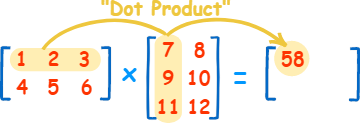<br>
<!-- $$
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\times
\begin{bmatrix}
7 & 8 \\
9 & 10 \\
11 & 12
\end{bmatrix}
=
$$ -->

In [16]:
# IDENTITY

torch.manual_seed(42)
a = torch.ones(3, 3)
b = torch.randint(0, 10, (3, 2)).float()
c = torch.matmul(a, b)
print(a)
print()
print(b)
print()
print(c)
print()

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])

tensor([[14., 16.],
        [14., 16.],
        [14., 16.]])



In [17]:
# SUM

torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
b = torch.randint(0, 10, (3, 2)).float()
c = torch.matmul(a, b)
print(a)
print()
print(b)
print()
print(c)
print()

tensor([[1., 0., 0.],
        [1., 1., 0.],
        [1., 1., 1.]])

tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])

tensor([[ 2.,  7.],
        [ 8., 11.],
        [14., 16.]])



In [18]:
# AVERAGE

torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0, 10, (3, 2)).float()
c = torch.matmul(a, b)
print(a)
print()
print(b)
print()
print(c)
print()

tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])

tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])

tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])



Using weight to take average of all tokens up until any particular token. In the form of matrix, the token weights are uniform. 

In [19]:
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
# # xbow = wei @ A    # (B, T, T) @ (B, T, C) ---> (B, T, C)
print(wei)

print()

tril = torch.tril(torch.ones(T, T))
print(tril)
print() 

# Could also achieve with softmax
wei = torch.zeros((T, T))
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
print(wei)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

In [20]:
class Embedder(nn.Module):
    def __init__(self, n_embd):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size, n_embd)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size)

    def forward(self, idx):
        tok_emb = self.token_embedding_table(idx) # (B, T, C)
        pos_emb = self.position_embedding_table(torch.arange(T)) # (T, C)
        x = tok_emb + pos_emb
        logits = self.lm_head(x)

<h3>Self-Attention</h3>
Recall that we used uniform weights to find average of previous tokens. The average is an over-simplified way of recalling from the past. We would like to use different weights on different types of tokens' queries and keys. (eg. verb would look for subject). So we use linear layers to convert, and use multiplication to have keys and queries interact.

In [21]:
torch.manual_seed(1337)
B, T, C = 4, 8, 32
x = torch.randn(B, T, C)

head_size = 16

key = nn.Linear(C, head_size, bias=False)
query = nn.Linear(C, head_size, bias=False)
value = nn.Linear(C, head_size, bias=False)

k = key(x)      # (B, T, 16)
q = query(x)    # (B, T, 16)


wei = q @ k.transpose(1, 2)     # (B, T, 16) @ (B, 16, T) --> (B, T, T)

tril = torch.tril(torch.ones(T, T))

'''
and to prevent keys and queries from looking into the future,
we use upper triangular masking
'''
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)


'''
finally, we apply attention, this is telling us the data dependant 
manner, how much we'd like to aggregate from the past.

But instead of raw x, we use a value, basically telling how much 
'''
# out = wei @ x
v = value(x)    # (B, T, 16)
out = wei @ v

print(out.shape)
print()
print(wei[0])

torch.Size([4, 8, 16])

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1574, 0.8426, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2088, 0.1646, 0.6266, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5792, 0.1187, 0.1889, 0.1131, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0294, 0.1052, 0.0469, 0.0276, 0.7909, 0.0000, 0.0000, 0.0000],
        [0.0176, 0.2689, 0.0215, 0.0089, 0.6812, 0.0019, 0.0000, 0.0000],
        [0.1691, 0.4066, 0.0438, 0.0416, 0.1048, 0.2012, 0.0329, 0.0000],
        [0.0210, 0.0843, 0.0555, 0.2297, 0.0573, 0.0709, 0.2423, 0.2391]],
       grad_fn=<SelectBackward0>)


In [26]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size, embed_size):
        super().__init__()
        self.key = nn.Linear(embed_size, head_size, bias=False)
        self.query = nn.Linear(embed_size, head_size, bias=False)
        self.value = nn.Linear(embed_size, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

    def forward(self, x):
        B, T, C = x.shape
        k = self.key(x)     # (B, T, C)
        q = self.query(x)   # (B, T, C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2, -1) * C ** -0.5   # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf'))  # (B, T, T)
        wei = F.softmax(wei, dim=-1)    # (B, T, T)
        # perform the weighted aggregation of the values
        v = self.value(x)   # (B, T, C)
        out = wei @ v   # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out


class MultiHeadAttention(nn.Module):
    def __init__(self, num_heads, head_size, n_embed, dropout):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size, n_embed) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embed, n_embed)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out


class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd, dropout):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)


class Block(nn.Module):
    def __init__(self, n_embed, n_head, drop_out):
        super().__init__()
        head_size = n_embed // n_head
        self.sa = MultiHeadAttention(n_head, head_size, n_embed, drop_out)
        self.ffwd = FeedFoward(n_embed, drop_out)
        self.layer_norm1 = nn.LayerNorm(n_embed)
        self.layer_norm2 = nn.LayerNorm(n_embed)

    def forward(self, x):
        x = x + self.sa(self.layer_norm1(x))
        x = x + self.ffwd(self.layer_norm2(x))
        return x


class GPT0(nn.Module):
    def __init__(self, vocab_size, n_embed=384, n_head=6, n_layer=6, drop_out=0.2):
        super().__init__()
        # each token directly reads off the logits for the next token from a lookup table
        self.token_embedding_table = nn.Embedding(vocab_size, n_embed)
        self.position_embedding_table = nn.Embedding(vocab_size, n_embed)
        
        self.blocks = nn.Sequential(*[Block(n_embed, n_head, drop_out) for _ in range(n_layer)])

        self.ln_f = nn.LayerNorm(n_embed)
        self.lm_head = nn.Linear(n_embed, vocab_size)

    def forward(self, index, target=None):
        B, T = index.shape

        token_embed = self.token_embedding_table(index) # (B, T, C)
        posit_embed = self.position_embedding_table(torch.arange(T)) # (T, C)

        x = token_embed + posit_embed   # (B, T, C)
        x = self.blocks(x)
        x = self.ln_f(x)
        logits = self.lm_head(x)  # (B, T, vocab_size)

        if target is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            target = target.view(B * T)
            loss = F.cross_entropy(logits, target)
        
        return logits, loss

    def generate(self, index, max_new_tokens):
        for _ in range(max_new_tokens):
            # crop index to the last block_size tokens
            index_cond = index[:, -block_size:]
            # get predictions
            logits, loss = self(index_cond)
            # focus on only the last time step
            logits = logits[:, -1, :] # Becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            index_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            index = torch.cat((index, index_next), dim=1) # (B, T+1)
        return index

model = GPT0(vocab_size).to('cuda')

# x = torch.tensor([[1,2,3,4,5,6,7], [1,1,1,1,1,1,1]]).to('cuda')
# y = model(x)
# print(y)


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper__index_select)

In [30]:
print(torch.arange(8))


tensor([0, 1, 2, 3, 4, 5, 6, 7])


In [23]:
# hyperparameters
batch_size = 64 # how many independent sequences will we process in parallel?
block_size = 256 # what is the maximum context length for predictions?
max_iters = 5000
eval_interval = 500
learning_rate = 3e-4
eval_iters = 200

device = 'cuda'


torch.manual_seed(1337)

# wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
with open('tinyshakespeare.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# here are all the unique characters that occur in this text
chars = sorted(list(set(text)))
vocab_size = len(chars)
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

# Train and test splits
data = torch.tensor(encode(text), dtype=torch.long)
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

# data loading
def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    ix = torch.randint(len(data) - block_size, (batch_size,))
    x = torch.stack([data[i:i+block_size] for i in ix])
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

In [24]:
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# generate from the model
context = torch.zeros((1, 1), dtype=torch.long, device=device)
print(decode(model.generate(context, max_new_tokens=500)[0].tolist()))
#open('more.txt', 'w').write(decode(m.generate(context, max_new_tokens=10000)[0].tolist()))

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument index in method wrapper__index_select)